In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt 
import statsmodels.api as sm 
from patsy import dmatrices 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn import metrics


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
print(sm.datasets.fair.NOTE)


::

    Number of observations: 6366
    Number of variables: 9
    Variable name definitions:

        rate_marriage   : How rate marriage, 1 = very poor, 2 = poor, 3 = fair,
                        4 = good, 5 = very good
        age             : Age
        yrs_married     : No. years married. Interval approximations. See
                        original paper for detailed explanation.
        children        : No. children
        religious       : How relgious, 1 = not, 2 = mildly, 3 = fairly,
                        4 = strongly
        educ            : Level of education, 9 = grade school, 12 = high
                        school, 14 = some college, 16 = college graduate,
                        17 = some graduate school, 20 = advanced degree
        occupation      : 1 = student, 2 = farming, agriculture; semi-skilled,
                        or unskilled worker; 3 = white-colloar; 4 = teacher
                        counselor social worker, nurse; artist, writers;
          

In [0]:
affairdata = sm.datasets.fair.load_pandas().data

In [6]:
affairdata.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [7]:
affairdata.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991


In [8]:
affairdata.isnull().sum()


rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
dtype: int64

In [9]:
affairdata.shape

(6366, 9)

In [10]:
affairdata.columns

Index(['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ',
       'occupation', 'occupation_husb', 'affairs'],
      dtype='object')

In [11]:
affairdata.age.unique()

array([32. , 27. , 22. , 37. , 42. , 17.5])

In [12]:
affairdata.age.value_counts()

27.0    1931
22.0    1800
32.0    1069
42.0     793
37.0     634
17.5     139
Name: age, dtype: int64

In [0]:
affairdata2=pd.DataFrame(affairdata.affairs)
pd.set_option('display.max_rows', affairdata2.shape[0]+1)
affairdata2

No handles with labels found to put in legend.


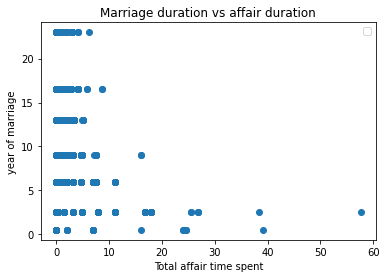

In [14]:
plt.scatter(affairdata2,affairdata.yrs_married)
plt.xlabel("Total affair time spent")
plt.ylabel("year of marriage")
plt.title("Marriage duration vs affair duration")
plt.legend()

In [15]:
affairdata['affairs'].max()


57.5999908

In [0]:
affairdata['affair'] = (affairdata['affairs']>0 ).astype(float)

In [0]:
affairdata

In [18]:
affairdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affairs          6366 non-null   float64
 9   affair           6366 non-null   float64
dtypes: float64(10)
memory usage: 497.5 KB


In [19]:
affairdata.dtypes

rate_marriage      float64
age                float64
yrs_married        float64
children           float64
religious          float64
educ               float64
occupation         float64
occupation_husb    float64
affairs            float64
affair             float64
dtype: object

In [20]:
(affairdata['affairs']== 0). sum() #getting the zeros values of a column (not talking about null values )

4313

In [0]:
affairdata

Text(0.5, 1.0, 'Rating vs Affairs duration')

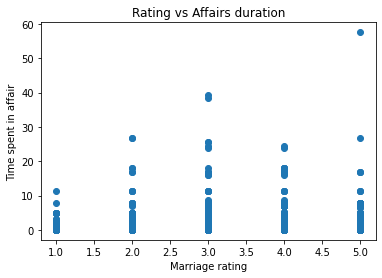

In [22]:
plt.scatter(affairdata.rate_marriage,affairdata.affairs)
plt.xlabel("Marriage rating")
plt.ylabel("Time spent in affair")
plt.title("Rating vs Affairs duration")

REMOVINT THE OUTLIERS WHICH HAVE THE 

In [23]:
(affairdata['affairs']>30).sum()

3

In [0]:
affairdata=affairdata[affairdata['affairs']<30]

In [0]:
affairdata

In [26]:
affairdata.shape

(6363, 10)

Text(0.5, 1.0, 'Rating vs Affairs duration')

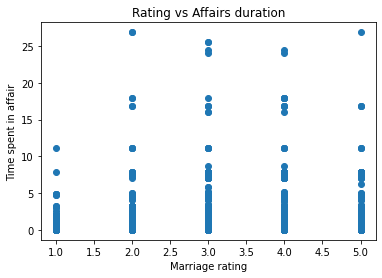

In [27]:
plt.scatter(affairdata.rate_marriage,affairdata.affairs)
plt.xlabel("Marriage rating")
plt.ylabel("Time spent in affair")
plt.title("Rating vs Affairs duration")

Text(0.5, 1.0, 'Rate marriage vs affairs')

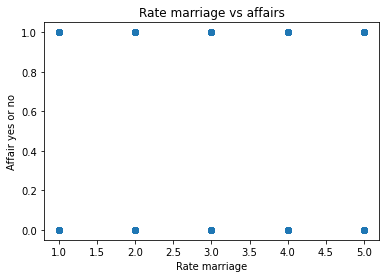

In [28]:
plt.scatter(affairdata.rate_marriage,affairdata.affair)
plt.xlabel("Rate marriage")
plt.ylabel("Affair yes or no")
plt.title("Rate marriage vs affairs")


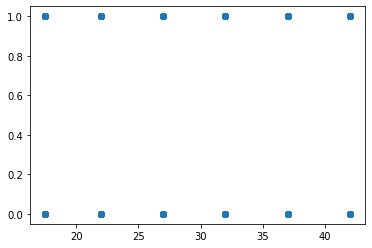

In [29]:
plt.scatter(affairdata.age,affairdata.affair)

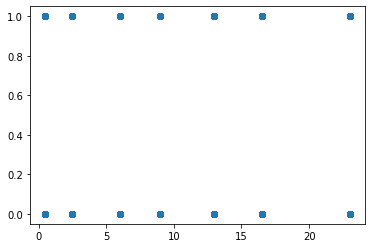

In [30]:
plt.scatter(affairdata.yrs_married,affairdata.affair)

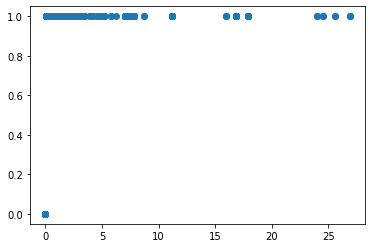

In [31]:
plt.scatter(affairdata.affairs,affairdata.affair)

In [32]:
from statsmodels.formula.api import logit
affair_mod = logit(
    "affair ~ occupation + educ + occupation_husb"
    "+ rate_marriage + age + yrs_married + children"
    " + religious",affairdata).fit()

Optimization terminated successfully.
         Current function value: 0.545102
         Iterations 6


In [33]:
print(affair_mod.summary())

                           Logit Regression Results                           
Dep. Variable:                 affair   No. Observations:                 6363
Model:                          Logit   Df Residuals:                     6354
Method:                           MLE   Df Model:                            8
Date:                Mon, 27 Apr 2020   Pseudo R-squ.:                  0.1327
Time:                        10:33:19   Log-Likelihood:                -3468.5
converged:                       True   LL-Null:                       -3999.1
Covariance Type:            nonrobust   LLR p-value:                8.736e-224
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.7179      0.299     12.442      0.000       3.132       4.304
occupation          0.1605      0.034      4.722      0.000       0.094       0.227
educ               -0.0391      

In [34]:
affair_mod

In [0]:
Y=affairdata['affair']

In [36]:
Y

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
5       1.0
6       1.0
7       1.0
8       1.0
9       1.0
10      1.0
11      1.0
12      1.0
13      1.0
14      1.0
15      1.0
16      1.0
17      1.0
18      1.0
19      1.0
20      1.0
21      1.0
22      1.0
23      1.0
24      1.0
25      1.0
26      1.0
27      1.0
28      1.0
29      1.0
30      1.0
31      1.0
32      1.0
33      1.0
34      1.0
35      1.0
36      1.0
37      1.0
38      1.0
39      1.0
40      1.0
41      1.0
42      1.0
43      1.0
44      1.0
45      1.0
46      1.0
47      1.0
48      1.0
49      1.0
50      1.0
51      1.0
52      1.0
53      1.0
54      1.0
55      1.0
56      1.0
57      1.0
58      1.0
59      1.0
60      1.0
61      1.0
62      1.0
63      1.0
64      1.0
65      1.0
66      1.0
67      1.0
68      1.0
69      1.0
70      1.0
71      1.0
72      1.0
73      1.0
74      1.0
75      1.0
76      1.0
77      1.0
78      1.0
79      1.0
80      1.0
81      1.0
82      1.0
83  

In [0]:
X=affairdata.drop(['affair','affairs'],axis='columns')

In [57]:
X.head()


,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0


In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=20)

In [0]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

In [41]:
logreg.fit(X_train,Y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
logreg.score(X_test,Y_test)

0.7140612725844462

Using K fold cross validation to mesaure accuracy of our linearRegresson model

In [48]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=20,test_size=0.2, random_state=0)
cross_val_score(logreg,X_train,Y_train,cv=cv)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([0.71119843, 0.69646365, 0.74656189, 0.71611002, 0.7151277 ,
       0.7259332 , 0.72298625, 0.72396857, 0.70726916, 0.72888016,
       0.72102161, 0.74852652, 0.73379175, 0.72396857, 0.70137525,
       0.73968566, 0.74950884, 0.72789784, 0.73379175, 0.73084479])

In [49]:
print(cv)

ShuffleSplit(n_splits=20, random_state=0, test_size=0.2, train_size=None)


In [51]:
from sklearn.model_selection import GridSearchCV
cv=ShuffleSplit(n_splits=6,test_size=0.4, random_state=0)
clf = GridSearchCV(logreg,
{
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
},
cv=cv,
return_train_score=False)
clf.fit(X_train,Y_train)
clf.cv_results_

{'mean_fit_time': array([0.04821992, 0.06299309, 0.07102013, 0.06109448, 0.05962805,
        0.06206926, 0.06188699]),
 'mean_score_time': array([0.00180161, 0.00182021, 0.00186547, 0.00177133, 0.00273752,
        0.0019292 , 0.00191152]),
 'mean_test_score': array([0.70587754, 0.72290439, 0.72519646, 0.72601506, 0.72576948,
        0.72560576, 0.72568762]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1, 10, 100, 1000],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 10},
  {'C': 100},
  {'C': 1000}],
 'rank_test_score': array([7, 6, 5, 1, 2, 4, 3], dtype=int32),
 'split0_test_score': array([0.71365422, 0.72445972, 0.72544204, 0.72642436, 0.72642436,
        0.7259332 , 0.7259332 ]),
 'split1_test_score': array([0.7043222 , 0.72102161, 0.72200393, 0.72298625, 0.72298625,
        0.72298625, 0.72298625]),
 'split2_test_score': array([0

In [52]:
df = pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,mean_test_score,std_test_score,rank_test_score
0,0.048220,0.004697,0.001802,0.000046,0.001,{'C': 0.001},0.713654,0.704322,0.714637,0.698919,0.704322,0.699411,0.705878,0.006222,7
1,0.062993,0.008362,0.001820,0.000038,0.01,{'C': 0.01},0.724460,0.721022,0.729862,0.721513,0.723477,0.717092,0.722904,0.003882,6
2,0.071020,0.009931,0.001865,0.000144,0.1,{'C': 0.1},0.725442,0.722004,0.733792,0.725933,0.723969,0.720039,0.725196,0.004335,5
3,0.061094,0.007448,0.001771,0.000076,1,{'C': 1},0.726424,0.722986,0.733301,0.725442,0.725442,0.722495,0.726015,0.003547,1
4,0.059628,0.004982,0.002738,0.002082,10,{'C': 10},0.726424,0.722986,0.732318,0.724951,0.725442,0.722495,0.725769,0.003229,2
5,0.062069,0.006822,0.001929,0.000048,100,{'C': 100},0.725933,0.722986,0.732318,0.724951,0.725442,0.722004,0.725606,0.003303,4
6,0.061887,0.005962,0.001912,0.000078,1000,{'C': 1000},0.725933,0.722986,0.732318,0.724951,0.725442,0.722495,0.725688,0.003218,3


In [53]:
df[['params','mean_test_score']]

,params,mean_test_score
0,{'C': 0.001},0.705878
1,{'C': 0.01},0.722904
2,{'C': 0.1},0.725196
3,{'C': 1},0.726015
4,{'C': 10},0.725769
5,{'C': 100},0.725606
6,{'C': 1000},0.725688


In [54]:
Y_predicted=logreg.predict(X_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_predicted)
cm

array([[780,  97],
       [267, 129]])

Text(69.0, 0.5, 'truth')

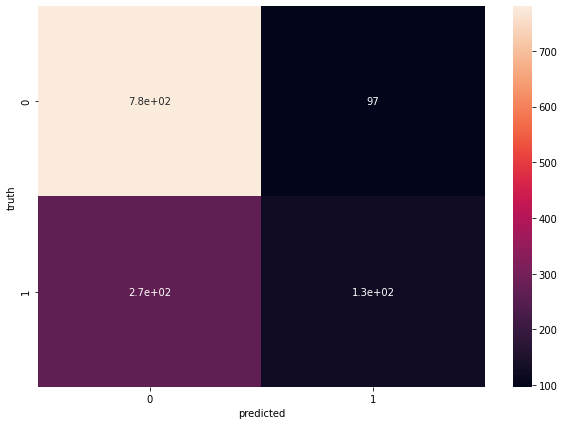

In [56]:
%matplotlib inline
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel("predicted")
plt.ylabel("truth")